In [1]:
%pwd
%pylab inline
data_dir = "Weather/"
%matplotlib inline
!mkdir -p $data_dir
!ls $data_dir

Populating the interactive namespace from numpy and matplotlib


The syntax of the command is incorrect.


data-source.txt
ghcnd-readme.txt
ghcnd-stations.txt
ghcnd-stations_buffered.txt
ghcnd-version.txt
SampleStations.pickle
samplestations.zip
snwd_all_stations.pickle
snwd_all_years.pickle
STAT.pickle
stations.pkl
tmax_all_stations.pickle
tmax_all_years.pickle


In [ ]:
!curl -o $data_dir/SampleStations.pickle http://mas-dse-open.s3.amazonaws.com/Weather/SampleStations.pickle

In [2]:
import pickle
Data=pickle.load(open('Weather/SampleStations.pickle','r'))
STAT,STAT_description=pickle.load(open('Weather/STAT.pickle','r'))

In [3]:
FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)

In [4]:
import pandas as pd

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]
    m_df[m]=t_df    

In [5]:
def create_reconstructions(m):
    Reconstructed = [[]]
    x = np.matrix(m_df[m].ix[:,3:])
    original = x.tolist()

    for j in range(1,4):
        u = np.matrix(STAT[m]['eigvec'][:,0:j])
        xnew = x - STAT[m]['Mean']
        recon = xnew*u*(u.T) + STAT[m]['Mean']
        Reconstructed.append(recon.T)
        if j==3:
            dist = [numpy.linalg.norm(recon[i] - x[i]) for i in range(len(x))]
            finaldist = []
            for n in range(len(dist)):
                if not math.isnan(dist[n]):
                    finaldist.append((dist[n],n))
            finaldist.sort(key=operator.itemgetter(0))
            s = len(finaldist)
            
            lower = []
            upper= []
            lower.append(finaldist[0][1])
            lower.append(finaldist[1][1])
            upper.append(finaldist[s-1][1])
            upper.append(finaldist[s-2][1])
   
    ## Put your code for computating reconstructions here
    
    yeardays=[i for i in (1,366)]
    plt.figure(figsize=(20,30),dpi=300)
    j=1
    c=0
    for l in lower:
        subplot(4,2,j)
        j+=1
        c+=1
        plot(original[l])
        plot(STAT[m]['Mean'])
        plot(Reconstructed[1][:,l])
        plot(Reconstructed[2][:,l])
        plot(Reconstructed[3][:,l])
        title('#' + str(c) + ' Sample for ' + m + ' (low residual error)')
        xlim([0,365])
        legend(['original','Mean','1','2','3'],loc=2)
    
    c=0
    for l in upper:
        subplot(4,2,j)
        j+=1
        c+=1
        plot(original[l])
        plot(STAT[m]['Mean'])
        plot(Reconstructed[1][:,l])
        plot(Reconstructed[2][:,l])
        plot(Reconstructed[3][:,l])
        title('#' + str(c) + ' Sample for ' + m + ' (high residual error)')
        xlim([0,365])
        legend(['original','Mean','1','2','3'],loc=2)

Reconstruction Plots for TMAX
Reconstruction Plots for SNWD


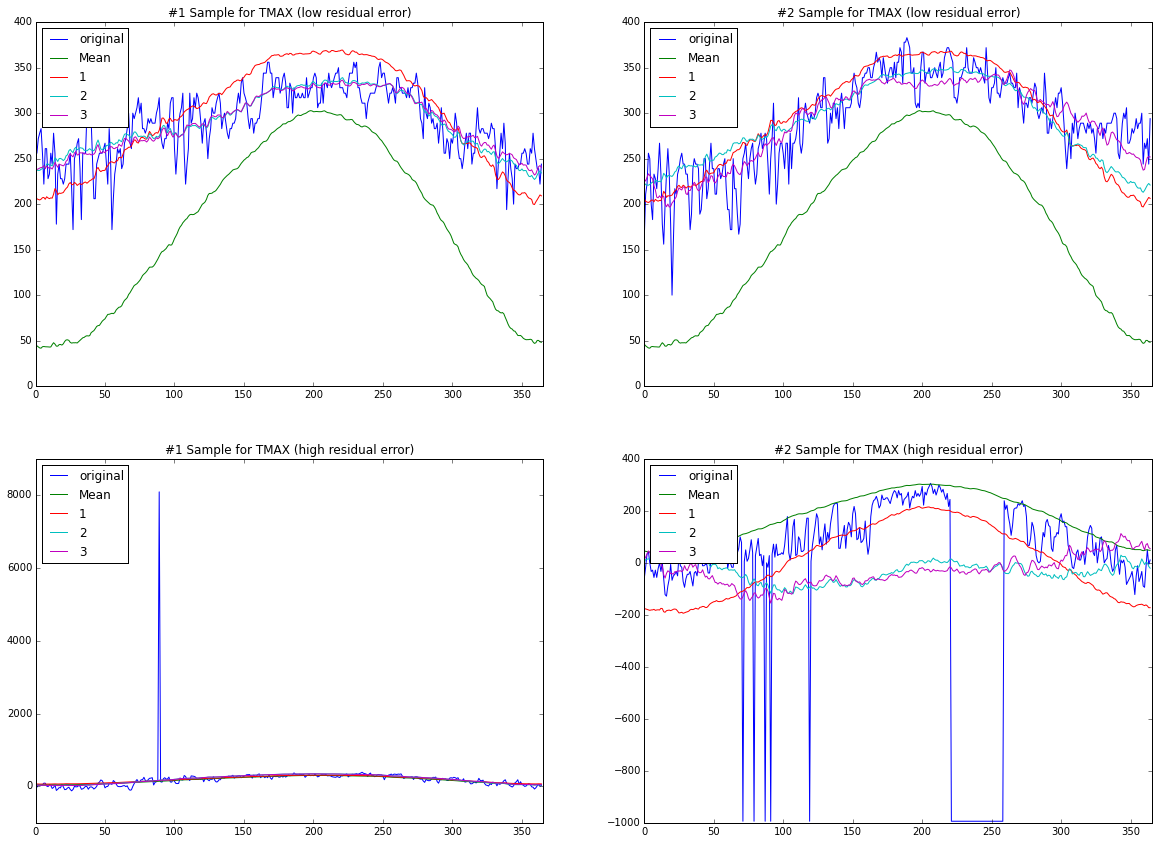

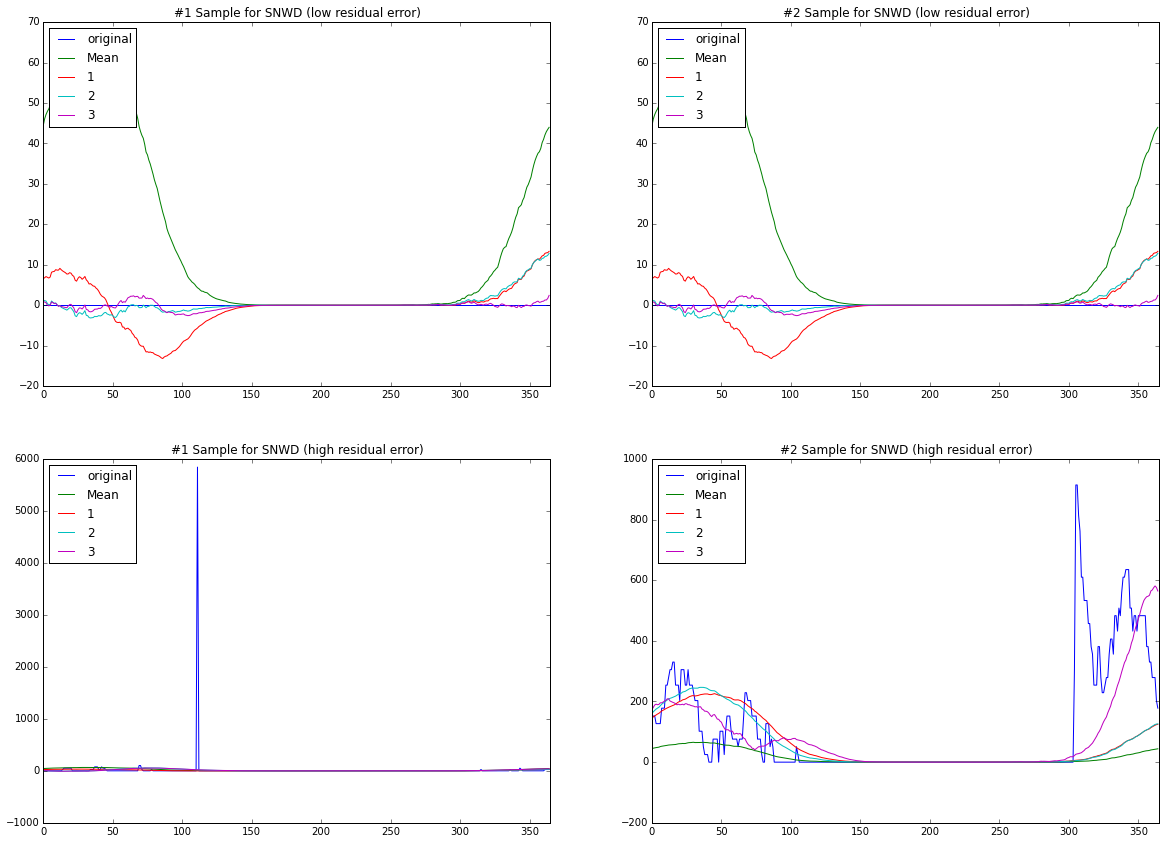

In [7]:
import numpy as np
import heapq
import math
import operator
for m in ['TMAX', 'SNWD']:
    print 'Reconstruction Plots for '+ m
    create_reconstructions(m)
    